In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
def generate_switch_world(prob, ntrials):
    '''
    Generate a world with defined number of trials
    ntrials: an array of num trials in each block
    prob: probability of reward in each block
    '''
    assert len(prob) == len(ntrials)
    targets = []
    truestates = []
    for i in range(len(prob)):
        probi = prob[i]
        ntrialsi = ntrials[i]
        truestate_i = [probi] * ntrialsi
        targets += list(np.random.rand(ntrialsi) < probi)
        truestates += list(truestate_i)
        
    
    return np.array(truestates)[:,None], np.array(targets)[:,None]
    
def logistic(x):
    return 1 / (1 + np.exp(-x))

def logit(x):
    return np.log(x / (1-x))

In [13]:
prob = [0.8,0.2,0.8,0.2]
ntrials = [120, 150, 90, 100]
states, obs = generate_switch_world(prob, ntrials)
rewards = (states > 0.5) == obs

In [4]:
def update_prob(pLprev, pswitch, prew, ct, rt):
    '''
    Returns the posterior belief of left/right ports on the next trial
    pswitch, prew: parameters of environment
    ct: current choice, -1 for left, 1 for right
    rt: current reward, 1 for reward, 0 for no rew
    '''
    if ct == 1 and rt == 1: # chose right, rew
        LLHrtGivenL = 1 - prew
        LLHrtGivenR = prew
    elif ct == -1 and rt == 1: # chose left, rew
        LLHrtGivenL = prew
        LLHrtGivenR = 1 - prew
    elif ct == 1 and rt == 0: # chose right, no rew
        LLHrtGivenL = prew
        LLHrtGivenR = 1 - prew
    else: # chose left, no rew
        LLHrtGivenL = 1 - prew
        LLHrtGivenR = prew
    
    pRprev = 1 - pLprev
    pLnew = (1 - pswitch) * LLHrtGivenL * pLprev + \
            pswitch * LLHrtGivenR * pRprev
    pRnew = pswitch * LLHrtGivenL * pLprev + \
            (1 - pswitch) * LLHrtGivenR * pRprev
    
    pL = pLnew / (pLnew + pRnew)
    pR = pRnew / (pRnew + pLnew)
    
    return pL, pR

def pickchoice(pR, mode):
    '''
    pickchoice probabilistically or deterministically
    '''
    pL = 1 - pR
    if mode == 'deterministic':
        return (pR > pL) * 2 - 1
    elif mode == 'random':
        probR = pR / (pL + pR)
        return (np.random.rand() < probR) * 2 - 1
        
def get_outcome(choice, target):
    return choice == target
        
        

In [29]:
pL = 0.5
pR = 0.5
choice_history = []
reward_history = []

pswitch = 0.05
prew = 0.55
pLlist = []

for i in range(len(obs)):
    choice = pickchoice(pR, 'random')
    reward = get_outcome(choice, obs[i] * 2 - 1)
    choice_history.append(choice)
    reward_history.append(reward)
    
    pL, pR = update_prob(pL, pswitch, prew, choice, reward)
    pLlist.append(pL)
    

<IPython.core.display.Javascript object>


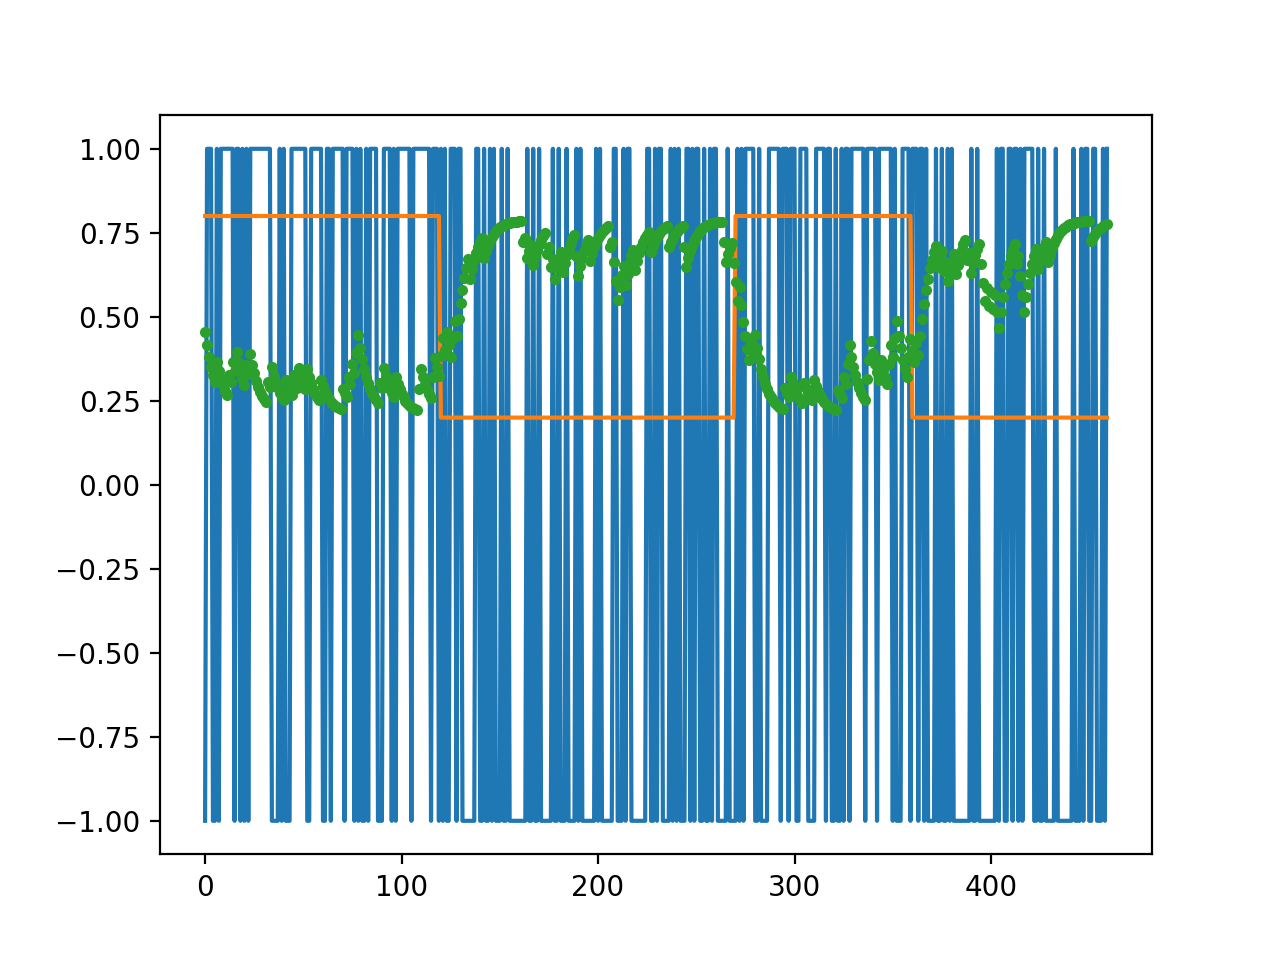

In [30]:
plt.plot(choice_history)
plt.plot(states)
plt.plot(pLlist, '.')

In [16]:
pLlist

[0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.95,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.95,
 0.05,
 0.95,
 0.05,
 0.95,
 0.05,
 0.05,
 0.05,
 0.05,
 0.95,
 0.05,
 0.95,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.95,
 0.05,
 0.95,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.95,
 0.05,
 0.05,
 0.05,
 0.95,
 0.05,
 0.05,
 0.95,
 0.05,
 0.05,
 0.05,
 0.95,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.95,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.95,
 0.05,
 0.05,
 0.95,
 0.05,
 0.95,
 0.05,
 0.95,
 0.9500000000000001,
 0.05000000000000002,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.95,
 0.05,
 0.95,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.95,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.95,
 0.9500000000000001,
 0.05000000000000002,
 0.05,
 0.05,
 0.05,
 0.05,
 0.95,
 0.9500000000000001,
 0.05000000000000002,
 0.05,
 0.95,
 0.9500000000000001,
 0.05000000000000002,
 0.95,
 0.05,
 0.05,
 0